In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading the pre-processed dataset
data = pd.read_csv('glass.csv')

In [3]:
#shape of the data
data.shape

(214, 10)

In [4]:
#first five rows of the data
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
#checking missing values in the data
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
# checking the data type
data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [7]:
# separating the independent and dependent variables

# storing all the independent variables as X
X = data.drop(['Type'], axis=1)

# storing the dependent variable as y
y = data['Type']

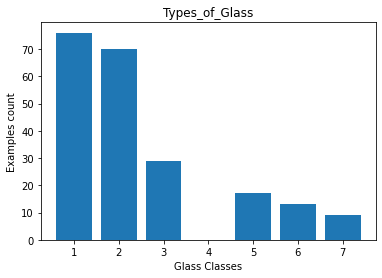

In [8]:
# visualisation to see classes of Glass and their count
glass_classes = y.unique()
values = y.value_counts()

plt.bar(glass_classes, values)
plt.title('Types_of_Glass')
plt.xlabel('Glass Classes')
plt.ylabel('Examples count')
plt.show()

In [9]:
# shape of independent and dependent variables
X.shape, y.shape

((214, 9), (214,))

In [10]:
#importing sklearn and train_test_split to create validation set
import sklearn
from sklearn.model_selection import train_test_split
#creating the train and validation set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state = 70)

In [11]:
# distribution in training set
y_train.value_counts(normalize=True)

2    0.356725
1    0.327485
7    0.134503
3    0.081871
5    0.058480
6    0.040936
Name: Type, dtype: float64

In [12]:
# distribution in testing set
y_test.value_counts(normalize=True)

2    0.348837
1    0.325581
7    0.139535
5    0.069767
3    0.069767
6    0.046512
Name: Type, dtype: float64

In [13]:
#shape of training set
X_train.shape, y_train.shape

((171, 9), (171,))

In [14]:
#shape of testing set
X_test.shape,y_test.shape

((43, 9), (43,))

In [15]:
#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

In [16]:
#fitting the model
dt_model = DecisionTreeClassifier(random_state=10)

In [17]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [18]:
#checking the training score
dt_model.score(X_train, y_train)

1.0

In [19]:
#checking the validation score
dt_model.score(X_test, y_test)

0.6511627906976745

In [20]:
#predictions on validation set
dt_predict=dt_model.predict(X_test)

In [23]:
dt_predict

array([1, 2, 7, 1, 2, 7, 2, 2, 1, 3, 7, 7, 1, 1, 6, 1, 1, 2, 6, 1, 1, 1,
       7, 2, 2, 1, 5, 2, 1, 1, 1, 2, 1, 1, 2, 6, 6, 2, 1, 2, 2, 1, 1],
      dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,dt_predict)

0.6511627906976745

# Changing the max_depth

In [26]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,15):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=6)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_test, y_test))

In [27]:
frame = pd.DataFrame({'max_depth':range(1,15), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.473684,0.465116
1,2,0.637427,0.581395
2,3,0.742690,0.604651
3,4,0.783626,0.627907
4,5,0.842105,0.651163


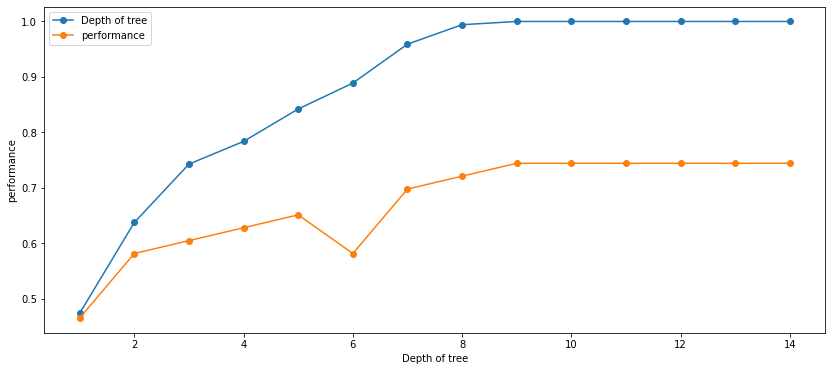

In [28]:
plt.figure(figsize=(14,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend(['Depth of tree','performance'])

In [29]:
dt_model = DecisionTreeClassifier(max_depth=9, max_leaf_nodes=35, random_state=10)

In [30]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=35, random_state=10)

In [31]:
#Training score
dt_model.score(X_train, y_train)

0.9883040935672515

In [32]:
#Validation score
dt_model.score(X_test, y_test)

0.7441860465116279

In [33]:
dt_predict1=dt_model.predict(X_test)

In [34]:
dt_predict1

array([1, 7, 7, 1, 2, 7, 2, 2, 1, 3, 7, 7, 1, 1, 6, 1, 2, 2, 6, 1, 2, 1,
       7, 2, 2, 1, 5, 3, 1, 1, 1, 2, 1, 1, 2, 6, 6, 1, 1, 2, 2, 1, 1],
      dtype=int64)

In [35]:
accuracy_score(y_test,dt_predict1)

0.7441860465116279

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
from sklearn import tree

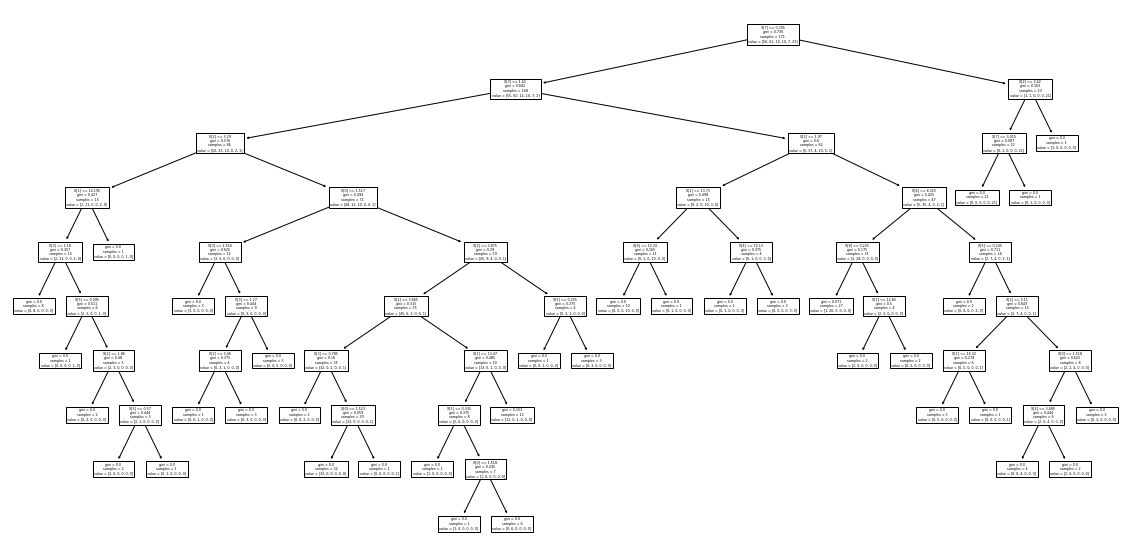

In [38]:
plt.figure(figsize = (20,10))
tree.plot_tree(dt_model);

# K-Nearest Neighbour

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
classifier_K = KNeighborsClassifier()

In [41]:
# important to mention that n_neighbors = 5, is not a multiple value of our quantity of features
classifier_K.fit(X_train,y_train)

KNeighborsClassifier()

In [42]:
predict_type_n = classifier_K.predict(X_test)

In [43]:
accuracy_score(y_test,predict_type_n)

0.6976744186046512

# SVM

In [44]:
from sklearn.svm import SVC
from sklearn import metrics

In [45]:
clf=SVC(kernel='linear')

In [46]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [47]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [48]:
y_pred = clf.predict(X_test)

In [49]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5813953488372093


In [50]:
# Get the confusion Matrix of the Model
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[10,  4,  0,  0,  0,  0],
       [ 6,  8,  0,  0,  1,  0],
       [ 3,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  1,  0,  5]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

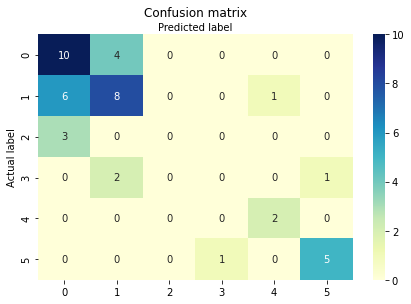

In [54]:
# Plot the Confusion Matrix as a HeatMap
import seaborn as sns
class_names=[0,1,2,3,4,5] # Name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [52]:
print(metrics.classification_report(y, clf.predict(X),zero_division=1)) # Displays a comprehensive Report of the SVC Model

              precision    recall  f1-score   support

           1       0.65      0.73      0.68        70
           2       0.61      0.71      0.66        76
           3       1.00      0.00      0.00        17
           5       0.80      0.62      0.70        13
           6       0.80      0.89      0.84         9
           7       0.96      0.90      0.93        29

    accuracy                           0.69       214
   macro avg       0.80      0.64      0.63       214
weighted avg       0.72      0.69      0.66       214

